**Importing the Libaries**

In [6]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import  Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku

import numpy as np

**Tokenizing**

In [7]:
tokenizer = Tokenizer()
data = open('text_file.txt').read()

corpus = data.lower().split('\n')

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index)+1

**trying**

In [8]:
for l in corpus:
  t_l = tokenizer.texts_to_sequences([l])[0]
  print(t_l)
  break

[258, 3, 49, 259, 33, 169]


**Training Data**

In [9]:
input_sequences = []

for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

In [10]:
# input_sequences

**Pad Sequence**

In [11]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences,
                                         maxlen=max_sequence_len,
                                         padding='pre'))

In [34]:
max_sequence_len

74

**Create Predictors and lable**

In [12]:
predictors, label = input_sequences[:,:-1], input_sequences[:,-1]

In [13]:
label = ku.to_categorical(label,num_classes=total_words)

**Model Building**

In [14]:
model = Sequential()

model.add(Embedding(total_words,100,input_length=max_sequence_len-1))

model.add(Bidirectional(LSTM(150, return_sequences=True)))

model.add(Dropout(0.2))

model.add(LSTM(100))

model.add(Dense(total_words/2, activation='relu',
                kernel_regularizer=regularizers.l2(0.01)))

model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 73, 100)           84900     
_________________________________________________________________
bidirectional (Bidirectional (None, 73, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 73, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 424)               42824     
_________________________________________________________________
dense_1 (Dense)              (None, 849)               360825    
Total params: 950,149
Trainable params: 950,149
Non-trainable params: 0
__________________________________________________

**Model Fitting and Accuracy**

In [ ]:
history = model.fit(predictors, label, epochs=100, verbose=1)

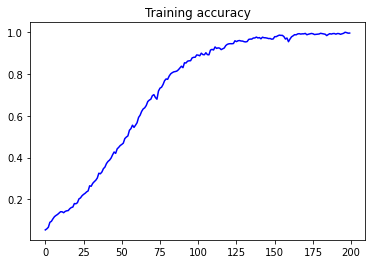

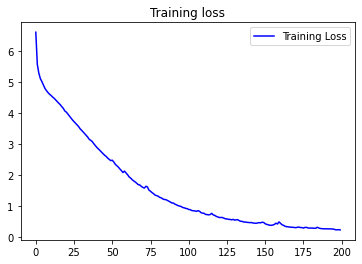

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()
plt.show()

**Model Save**

In [24]:
from keras.models import load_model

model.save('quotes_1.h5')

**loading the model**

In [29]:
import tensorflow as tf
model = tf.keras.models.load_model('quotes_1.h5')

**Generate New Poems**

In [32]:
seed_text = "my heart"
next_words = 30
  
for _ in range(next_words):
 token_list = tokenizer.texts_to_sequences([seed_text])[0]
 token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
 predicted = model.predict_classes(token_list, verbose=0)
 output_word = ""
 for word, index in tokenizer.word_index.items():
  if index == predicted:
   output_word = word
   break
 seed_text += " " + output_word

In [33]:
seed_text

'my heart and not a romantic man and i am deeply in love with you and i want to shout how happy i am until the end of times a mess can’t'